Expense added successfully.
Expense added successfully.
Expense added successfully.
Expense added successfully.
Expense added successfully.

=== Total Spending Overview ===
Total amount spent: ₹5781.00

Highest Expense:
Date: 2025-06-12, Category: Rent, Amount: ₹5000.00, Description: June Rent

Lowest Expense:
Date: 2023-01-20, Category: Transport, Amount: ₹15.50, Description: Bus fare

=== Category-wise Summary ===
+---------------+-------------+-------------------+----------------+
|   Category    | Total Spent | Transaction Count | Percentage (%) |
+---------------+-------------+-------------------+----------------+
|  Eating Out   |    60.0     |        2.0        |      1.04      |
| Entertainment |    40.0     |        2.0        |      0.69      |
|     Food      |    150.0    |        1.0        |      2.59      |
|   Groceries   |    250.0    |        4.0        |      4.32      |
|     Rent      |   5000.0    |        1.0        |     86.49      |
|   Transport   |    81.0   

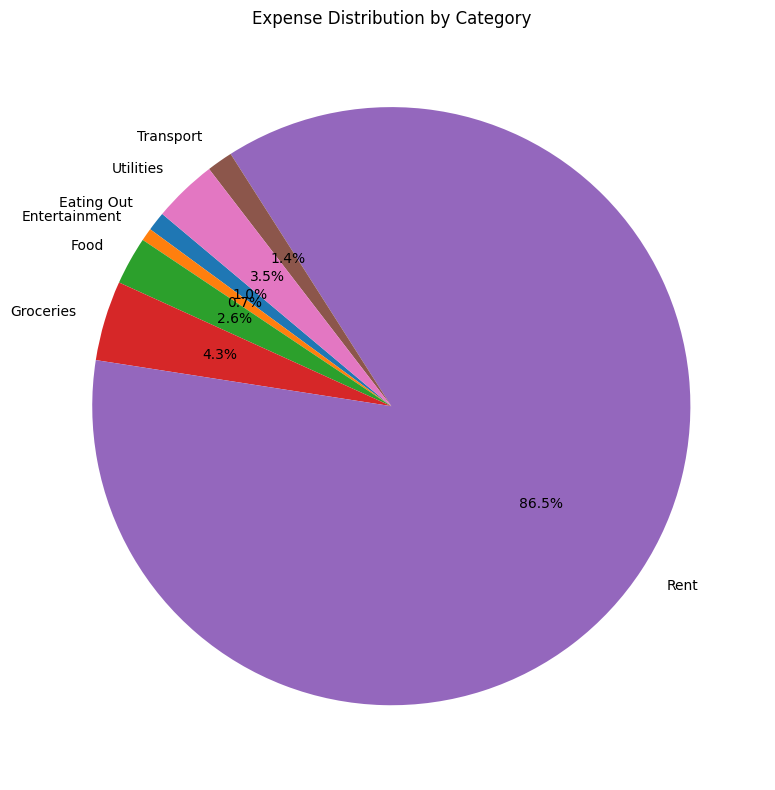


Expenses in January 2023:
      Date  Category  Amount      Description
2023-01-15 Groceries    50.0 Weekly groceries
2023-01-20 Transport    15.5         Bus fare
2023-01-15 Groceries    50.0 Weekly groceries
2023-01-20 Transport    15.5         Bus fare

Expenses between Feb 1, 2023 and Mar 31, 2023:
      Date      Category  Amount         Description
2023-02-10    Eating Out    30.0 Dinner with friends
2023-02-25     Groceries    75.0    Monthly stock up
2023-03-05 Entertainment    20.0        Movie ticket
2023-02-10    Eating Out    30.0 Dinner with friends
2023-02-25     Groceries    75.0    Monthly stock up
2023-03-05 Entertainment    20.0        Movie ticket

=== Total Spending Overview ===
Total amount spent: ₹5781.00

Highest Expense:
Date: 2025-06-12, Category: Rent, Amount: ₹5000.00, Description: June Rent

Lowest Expense:
Date: 2023-01-20, Category: Transport, Amount: ₹15.50, Description: Bus fare

=== Category-wise Summary ===
+---------------+-------------+-------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import os

# ========================
# Utility Functions
# ========================

def load_data(file_path='expenses.csv'):
    """
    Load data from CSV file into a DataFrame.
    If the file doesn't exist or is empty, return an empty DataFrame with required columns.
    """
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
            return df
        except pd.errors.EmptyDataError:
            return pd.DataFrame(columns=['Date', 'Category', 'Amount', 'Description'])
    else:
        return pd.DataFrame(columns=['Date', 'Category', 'Amount', 'Description'])

def save_data(df, file_path='expenses.csv'):
    """
    Save the DataFrame to a CSV file.
    """
    df.to_csv(file_path, index=False)

# ========================
# Analysis and Reporting
# ========================

def show_summary(df):
    """
    Print total expenses, highest and lowest spending,
    and a category-wise summary including percentage share.
    """
    if df.empty:
        print("No expenses recorded yet.")
        return

    total_spent = df["Amount"].sum()
    highest = df.loc[df["Amount"].idxmax()]
    lowest = df.loc[df["Amount"].idxmin()]

    print("\n=== Total Spending Overview ===")
    print(f"Total amount spent: ₹{total_spent:.2f}")
    print("\nHighest Expense:")
    print(f"Date: {highest['Date'].date()}, Category: {highest['Category']}, "
          f"Amount: ₹{highest['Amount']:.2f}, Description: {highest['Description']}")
    print("\nLowest Expense:")
    print(f"Date: {lowest['Date'].date()}, Category: {lowest['Category']}, "
          f"Amount: ₹{lowest['Amount']:.2f}, Description: {lowest['Description']}")

    # Grouping by category
    group = df.groupby("Category")["Amount"]
    category_sum = group.sum()
    category_count = group.count()
    category_pct = (category_sum / total_spent * 100).round(2)

    summary_df = pd.DataFrame({
        "Total Spent": category_sum,
        "Transaction Count": category_count,
        "Percentage (%)": category_pct
    })

    print("\n=== Category-wise Summary ===")
    print(tabulate(summary_df, headers="keys", tablefmt="pretty"))
    return summary_df

def plot_pie(df):
    """
    Generate a pie chart of expenses by category.
    """
    if df.empty:
        print("No expenses recorded yet.")
        return

    category_sum = df.groupby("Category")["Amount"].sum()
    plt.figure(figsize=(8, 8))
    category_sum.plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Expense Distribution by Category')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# ========================
# Data Input
# ========================

def add_expense(date, category, amount, description, file_path='expenses.csv'):
    """
    Add a new expense record to the CSV.
    """
    df = load_data(file_path)
    new_expense = pd.DataFrame({
        "Date": [pd.to_datetime(date)],
        "Category": [category],
        "Amount": [float(amount)],
        "Description": [description]
    })
    df = pd.concat([df, new_expense], ignore_index=True)
    save_data(df, file_path)
    print("Expense added successfully.")

# ========================
# Filtering
# ========================

def filter_by_month(df, month):
    """
    Filter records by month in YYYY-MM format.
    """
    if df.empty:
        print("No expenses recorded yet.")
        return pd.DataFrame()
    try:
        filtered_df = df[df['Date'].dt.strftime('%Y-%m') == month]
        if filtered_df.empty:
            print(f"No expenses found for the month {month}.")
        return filtered_df
    except Exception as e:
        print(f"Error filtering by month: {e}")
        return pd.DataFrame()

def filter_by_range(df, start_date, end_date):
    """
    Filter records between two dates (YYYY-MM-DD).
    """
    if df.empty:
        print("No expenses recorded yet.")
        return pd.DataFrame()
    try:
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        mask = (df['Date'] >= start) & (df['Date'] <= end)
        filtered_df = df.loc[mask]
        if filtered_df.empty:
            print(f"No expenses found between {start.date()} and {end.date()}.")
        return filtered_df
    except Exception as e:
        print(f"Error filtering by range: {e}")
        return pd.DataFrame()

# ========================
# Example Workflow (Notebook Use)
# ========================

# Setup: Ensure CSV file exists with headers
data_file = "expenses.csv"
if not os.path.exists(data_file) or os.path.getsize(data_file) == 0:
    save_data(pd.DataFrame(columns=['Date', 'Category', 'Amount', 'Description']), data_file)

# Add sample data
add_expense("2023-01-15", "Groceries", 50.00, "Weekly groceries")
add_expense("2023-01-20", "Transport", 15.50, "Bus fare")
add_expense("2023-02-10", "Eating Out", 30.00, "Dinner with friends")
add_expense("2023-02-25", "Groceries", 75.00, "Monthly stock up")
add_expense("2023-03-05", "Entertainment", 20.00, "Movie ticket")

# Load and display all data
df = load_data(data_file)
show_summary(df)
plot_pie(df)

# Filter by month
df_jan = filter_by_month(df, "2023-01")
if not df_jan.empty:
    print("\nExpenses in January 2023:")
    print(df_jan.to_string(index=False))

# Filter by date range
df_feb_march = filter_by_range(df, "2023-02-01", "2023-03-31")
if not df_feb_march.empty:
    print("\nExpenses between Feb 1, 2023 and Mar 31, 2023:")
    print(df_feb_march.to_string(index=False))

# Export summary report
summary = show_summary(df)
summary.to_csv("summary_report.csv")
print("\nSummary exported to summary_report.csv")
